# Options Hedging and Trading Strategies

# I. Pricing an Option

## 1. Retrieving Option Data from Yahoo! Finance


In [160]:
# Code to Check Available Expiration Dates
import yfinance as yf

def check_available_expiration_dates(ticker):
    stock = yf.Ticker(ticker)
    expiration_dates = stock.options
    return expiration_dates

# Define the ticker symbol
ticker = 'IBM'

# Get available expiration dates
available_dates = check_available_expiration_dates(ticker)
print("Available expiration dates:")
print(available_dates)

Available expiration dates:
('2024-09-06', '2024-09-13', '2024-09-20', '2024-09-27', '2024-10-04', '2024-10-18', '2024-11-15', '2025-01-17', '2025-03-21', '2025-04-17', '2025-06-20', '2026-01-16')


After verifying the available expiration dates, use one of those dates to fetch the options data:

In [161]:
import yfinance as yf

def get_option_data(ticker, exp_date):
    stock = yf.Ticker(ticker)
    
    # Get all available expiration dates
    expiration_dates = stock.options
    
    # Check if the desired expiration date is available
    if exp_date not in expiration_dates:
        raise ValueError(f"Expiration date {exp_date} not available for ticker {ticker}")
    
    # Get the options data for the given expiration date
    options = stock.option_chain(exp_date)
    
    # Return the puts and calls dataframes
    return options.puts, options.calls

# Define ticker and expiration date
ticker = 'IBM'
exp_date = '2024-09-20'  # Use a valid expiration date from the available dates

# Fetch the options data
puts, calls = get_option_data(ticker, exp_date)

# Print the first few rows of puts and calls
print("Puts:")
print(puts.head())
print("\nCalls:")
print(calls.head())

Puts:
       contractSymbol             lastTradeDate  strike  lastPrice   bid  \
0  IBM240920P00075000 2024-06-13 15:23:04+00:00    75.0       0.01  0.00   
1  IBM240920P00080000 2024-06-14 15:05:56+00:00    80.0       0.01  0.00   
2  IBM240920P00085000 2024-07-22 16:16:16+00:00    85.0       0.04  0.00   
3  IBM240920P00090000 2024-07-22 16:09:10+00:00    90.0       0.08  0.00   
4  IBM240920P00095000 2024-07-10 14:29:21+00:00    95.0       0.09  0.01   

    ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  1.27     0.0            0.0     2.0           5.0           2.144536   
1  2.13     0.0            0.0     2.0         111.0           2.209965   
2  0.37     0.0            0.0     1.0          13.0           1.578127   
3  0.37     0.0            0.0     2.0          30.0           1.480471   
4  0.78     0.0            0.0     2.0          97.0           1.548830   

   inTheMoney contractSize currency  
0       False      REGULAR      USD  
1       Fa

## 2. Pricing a Call & Put Option

An option buyer pays to acquire the right to buy (or sell) something in the future while an option seller receives an upfront payment to bear an obligation to sell to (or buy from) the option buyer. A call option buyer has the right to buy a stock at a fixed price and at a fixed date in the future. A European option can only be exercised when the option expires, while an American option could be exercised any time before or at the maturity date.

### Pricing a Long & Short Call Option

- For a call option buyer, the profit is calculated using the following formula:

                             Buyer Profit/Loss (Call) = Max (ST - X, 0) - c


- For a call option seller, the profit is calculated by using the following formula:

                             Seller Profit/Loss call = c -  Max (ST - X, 0)


The profit should include the cost of buying the call option.

A graph showing the profit/loss functions for the call option buyer and seller is generated using the following code:

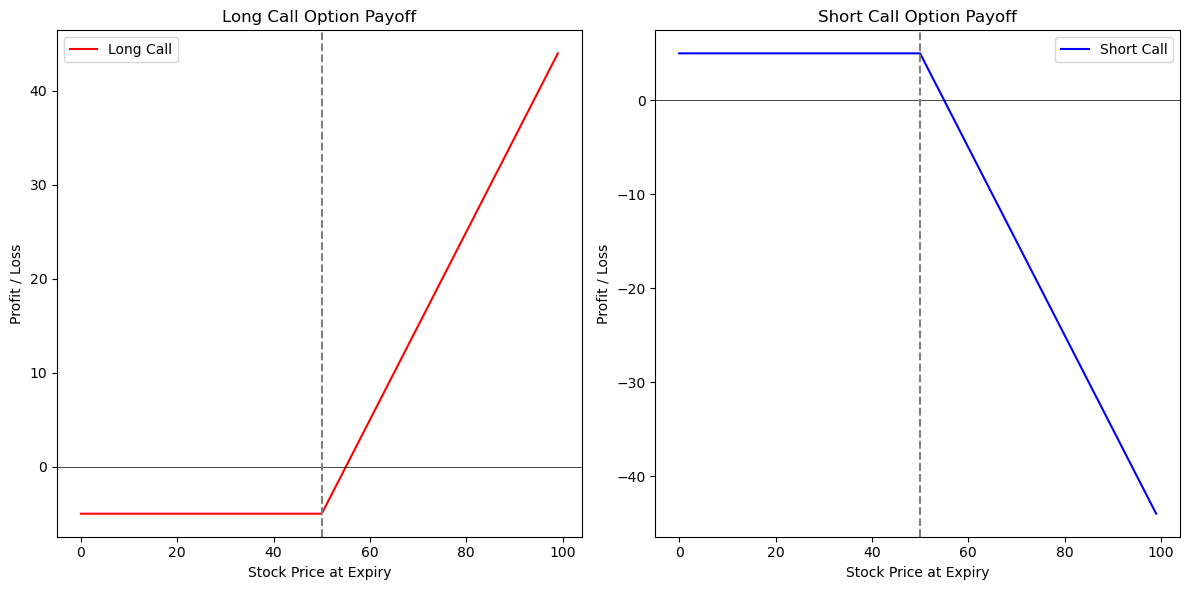

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_option_payoffs(S0, K, c):
    """
    Plots the profit/loss for Long Call and Short Call options.
    
    """
    # Define stock price range
    ST = np.arange(0, 2 * K, 1)
    
    # Long Call Payoff
    long_call_payoff = np.maximum(ST - K, 0) - c
    
    # Short Call Payoff
    short_call_payoff = c - np.maximum(ST - K, 0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Long Call Plot
    plt.subplot(1, 2, 1)
    plt.plot(ST, long_call_payoff, label='Long Call', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K, color='gray', linestyle='--')
    plt.title('Long Call Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    
    # Short Call Plot
    plt.subplot(1, 2, 2)
    plt.plot(ST, short_call_payoff, label='Short Call', color='Blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K, color='gray', linestyle='--')
    plt.title('Short Call Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Parameters
S0 = 50        # Current stock price
K = 50         # Strike price
c = 5          # Premium for the call option

# Plot the option payoffs
plot_option_payoffs(S0, K, c)

- Long Call Plot shows that the profit starts at zero and increases linearly as the stock price rises above the strike price K = 50. The loss is limited to the premium paid c = 5 when the stock price is below K.

- Short Call Plot shows that the profit is limited to the premium received c when the stock price is below K. The loss increases linearly as the stock price rises above K, potentially becoming very large.

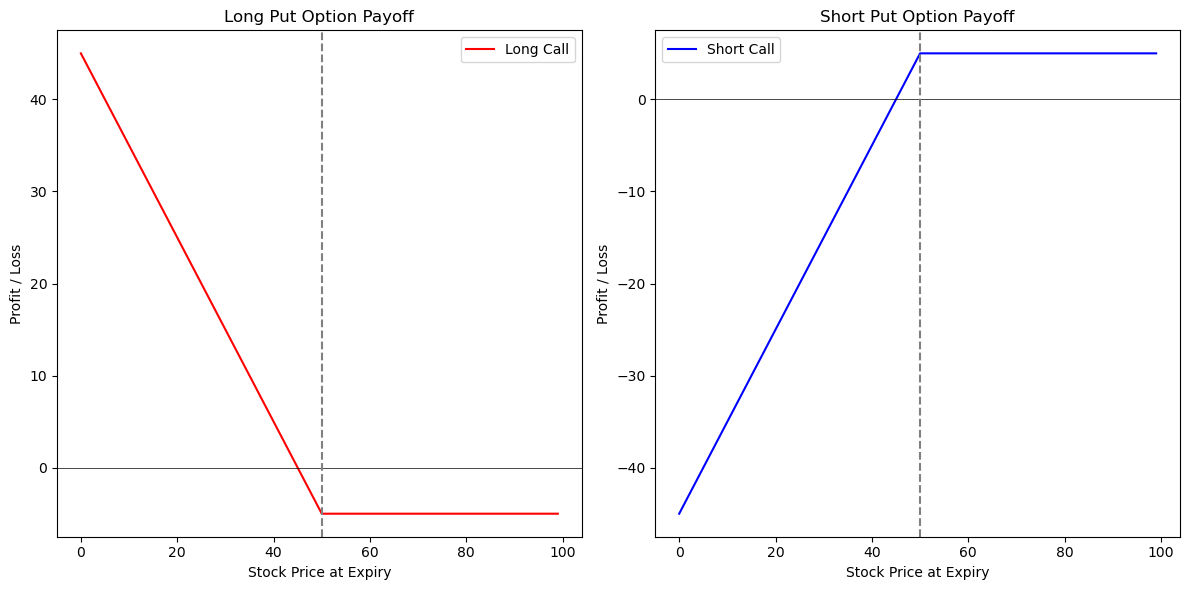

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_option_payoffs(S0, K, p):
    """
    Plots the profit/loss for Long Put and Short Put options.
    
    """
    # Define stock price range
    ST = np.arange(0, 2 * K, 1)
    
    # Long Put Payoff
    long_put_payoff = np.maximum(K - ST, 0) - p
    
    # Short Put Payoff
    short_put_payoff = p - np.maximum(K - ST, 0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Long Put Plot
    plt.subplot(1, 2, 1)
    plt.plot(ST, long_put_payoff, label='Long Call', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K, color='gray', linestyle='--')
    plt.title('Long Put Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    
    # Short Put Plot
    plt.subplot(1, 2, 2)
    plt.plot(ST, short_put_payoff, label='Short Call', color='Blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K, color='gray', linestyle='--')
    plt.title('Short Put Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Parameters
S0 = 50        # Current stock price
K = 50         # Strike price
p = 5          # Premium for the call option

# Plot the option payoffs
plot_option_payoffs(S0, K, p)

## 3. Pricing Call & Put using Black-Scholes

The Black-Scholes model is a widely used option pricing model that provides a theoretical estimate of European-style options' prices. 

Black-Scholes Call and Black-Scholes Put compute the prices of call and put options using the Black-Scholes formulas.

This implementation assumes European-style options, which can only be exercised at expiration. The Black-Scholes model does not account for dividends or other market complexities, so it is ideal for theoretical or baseline calculations.


In [4]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.
    
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European put option.
    
    Parameters:
    S0: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate (annualized)
    sigma: Volatility (annualized)
    
    Returns:
    Put option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1))
    return put_price

# Example usage
S0 = 50       # Current stock price
K = 50        # Strike price
T = 1         # Time to maturity (in years)
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility

call_price = black_scholes_call(S0, K, T, r, sigma)
put_price = black_scholes_put(S0, K, T, r, sigma)

print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")

Call Option Price: $5.23
Put Option Price: $2.79


### 4. Pricing a Call & Put using the Monte Carlo method

To price European-style call and put options using the Monte Carlo method, we simulate multiple paths of the underlying asset's price using random sampling and then estimate the option price based on the average payoff from these simulations. In other words, after knowing the terminal prices, we could estimate the payoff for a call if the exercise price is given. The mean of those discounted payoffs using the risk-free rate as our discount rate will be our call price. 

Steps to Price Options Using Monte Carlo Simulation:

- Simulate Asset Paths: Use the Geometric Brownian Motion (GBM) model to generate multiple paths of the underlying asset's price.

- Calculate Payoffs: For each simulated path, calculate the payoff of the option at maturity.

- Discount Payoffs: Discount the average payoff back to the present value using the risk-free rate.

- Average Payoffs: Average the discounted payoffs to estimate the option price.

The following code is a simulation for pricing a European call & put option using the Monte Carlo method.

In [5]:
import numpy as np

def monte_carlo_option_price(S0, K, T, r, sigma, option_type='call', n_simulations=10000, n_steps=100):
    """
    Price an option using the Monte Carlo simulation.
    
    Parameters:
    S0: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate (annualized)
    sigma: Volatility (annualized)
    option_type: 'call' for Call option, 'put' for Put option
    n_simulations: Number of simulation paths
    n_steps: Number of time steps per simulation
    
    Returns:
    Option price
    """
    dt = T / n_steps
    discount_factor = np.exp(-r * T)
    
    # Initialize the simulated end prices array
    final_prices = np.zeros(n_simulations)
    
    # Simulate paths
    for i in range(n_simulations):
        S = S0
        for _ in range(n_steps):
            Z = np.random.normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        final_prices[i] = S
    
    # Calculate payoffs
    if option_type == 'call':
        payoffs = np.maximum(final_prices - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - final_prices, 0)
    else:
        raise ValueError("Invalid option_type. Use 'call' or 'put'.")
    
    # Calculate the option price
    option_price = discount_factor * np.mean(payoffs)
    
    return option_price

# Example usage
S0 = 50        # Current stock price
K = 50         # Strike price
T = 1          # Time to maturity (in years)
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility

call_price = monte_carlo_option_price(S0, K, T, r, sigma, option_type='call')
put_price = monte_carlo_option_price(S0, K, T, r, sigma, option_type='put')

print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")

Call Option Price: $5.19
Put Option Price: $2.76


- Function monte_carlo_option_price simulates multiple paths for the stock price using the GBM model. Then, computes the payoff for each path based on whether it is a call or put option and discounts the average payoff to get the option price.

- Number of Simulations: More simulations generally improve the accuracy of the result but increase computation time.

- Number of Steps: Increasing the number of time steps can make the simulation more accurate but also more computationally intensive.

This Monte Carlo simulation approach is particularly useful for pricing options with complex features or path-dependent options that are difficult to value using closed-form solutions.

# II. Options Hedging & Trading Strategy

Options can be used and combined with the underlying asset to hedge or trade a view on market direction and volatility. So, combining different expiry profiles create either speculative positions or to hedge an existing position.

Steps:

1. Draw the individual option expiry profiles on the graph - make sure they are correct in terms of proportions (premiums paid or received)
2. Divide payoff diagram into zones defined by exercise prices of options
3. Analyze the slope of the payoff diagram in each zone
4. Follow the rules for combining lines

Different combination results in the following strategies:
- Long Call Hedge: Long asset and long ATM put 
- Short Call: Short asset and short ATM put
- Long Put: Short asset and long ATM call
- Short Put: Long asset and short ATM call


## 1. Long Call Hedge: Long asset and long ATM put 


The Long Call Hedge or Long Asset and Long ATM Put strategy is a hedging strategy where an investor holds a long position in the underlying asset (such as a stock) and simultaneously buys an At-the-Money (ATM) Put option for downside protection. This strategy is useful for protecting against potential losses while still allowing for profit if the asset's price rises.

- Long Asset (Stock): The investor buys and holds the underlying asset.
- Long ATM Put Option: The investor buys a put option with a strike price equal to the current price of the asset (ATM put) which provides protection against a decline in the asset's price.

The combined payoff of this strategy at expiration:

                                   Long Asset Payoff = ST - S0

                             Long ATM Put Payoff = Max(K - ST, 0) - p

                         Combined Payoff = (ST - S0) + Max(K - ST, 0) - p



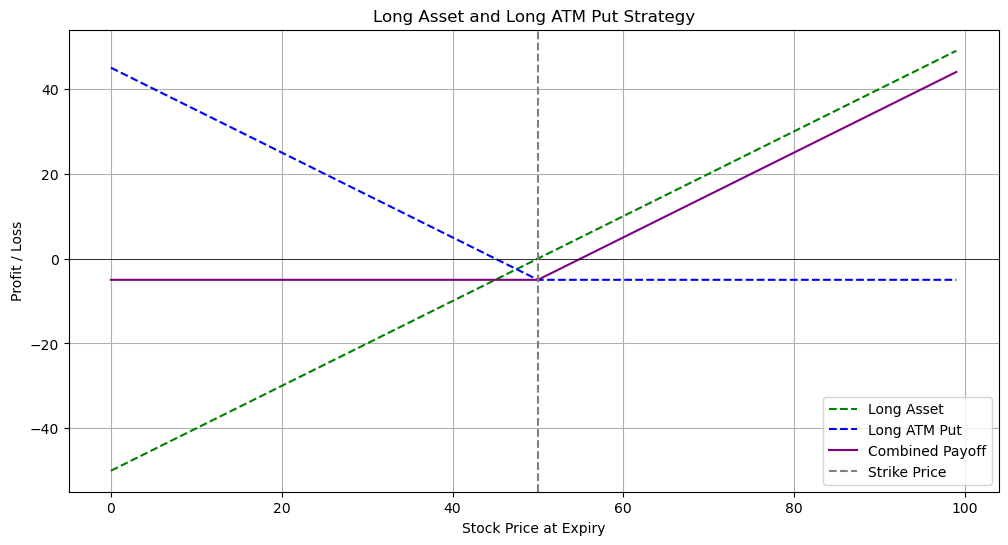

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_long_asset_long_atm_put(S0, p):
    """
    Plots the profit/loss for a Long Asset and Long ATM Put strategy.
    
    """
    ST = np.arange(0, 2 * S0, 1)  # Range of possible stock prices at expiry
    
    # Long Asset Payoff
    long_asset_payoff = ST - S0
    
    # Long ATM Put Payoff
    long_put_payoff = np.maximum(S0 - ST, 0) - p
    
    # Combined Payoff
    combined_payoff = long_asset_payoff + long_put_payoff
    
    plt.figure(figsize=(12, 6))
    plt.plot(ST, long_asset_payoff, label='Long Asset', color='green', linestyle='--')
    plt.plot(ST, long_put_payoff, label='Long ATM Put', color='blue', linestyle='--')
    plt.plot(ST, combined_payoff, label='Combined Payoff', color='purple')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(S0, color='gray', linestyle='--', label='Strike Price')
    plt.title('Long Asset and Long ATM Put Strategy')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
S0 = 50          # Initial stock price (and strike price for the ATM Put)
p = 5  # Premium paid for the Long ATM Put

# Plot the Long Asset and Long ATM Put strategy
plot_long_asset_long_atm_put(S0, p)

Combination of a Long Asset and Long Put results in a Long Call:
- We have a up line from the Long Asset and down line from the Long Put which will be a result of a flat line.
- We have a up line from the Long Asset and up line from the Long Put which will be a result of a up line.


## 2. Long Put: Short Asset and Long ATM Call

Long Put or the Short Asset and Long ATM Call strategy is a hedging or speculative strategy where an investor sells the underlying asset and buys an At-the-Money (ATM) Call option. This strategy can be used to profit from a decline in the asset's price, while the ATM Call provides upside protection if the price rises.

- Short Asset (Stock): The investor sells the underlying asset, expecting the price to fall.

- Long ATM Call Option: The investor buys a call option with a strike price equal to the current price of the asset (ATM call). This provides protection against a price increase.

The combined payoff of this strategy at expiration:

                                   Short Asset Payoff = S0 - ST

                             Long ATM Call Payoff = Max(ST - K, 0) - c

                         Combined Payoff = (S0 - ST) + Max(ST - K, 0) - c

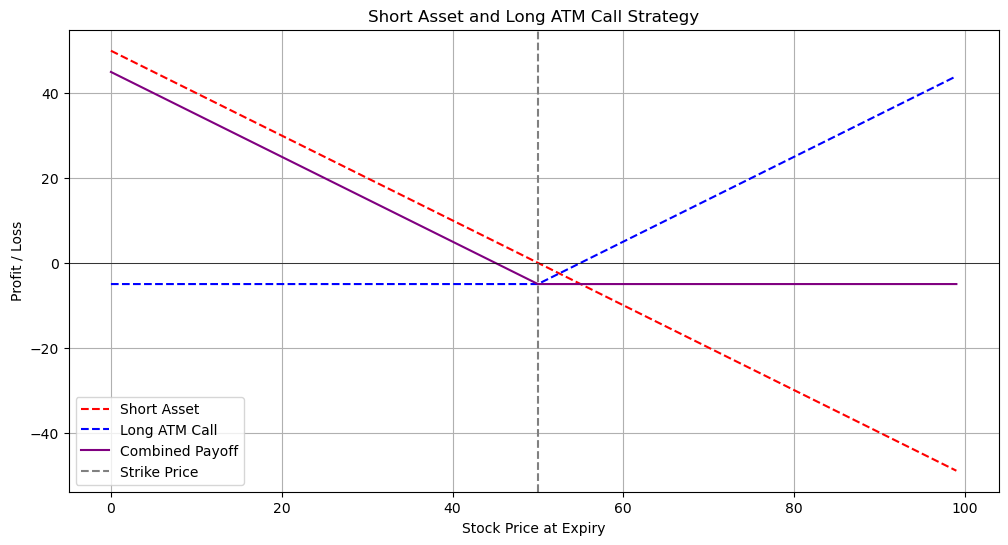

In [29]:
def plot_short_asset_long_atm_call(S0, c):
    """
    Plots the profit/loss for a Short Asset and Long ATM Call strategy.
    
    """
    ST = np.arange(0, 2 * S0, 1)  # Range of possible stock prices at expiry
    
    # Short Asset Payoff
    short_asset_payoff = S0 - ST
    
    # Long ATM Call Payoff
    long_call_payoff = np.maximum(ST - S0, 0) - c
    
    # Combined Payoff
    combined_payoff = short_asset_payoff + long_call_payoff
    
    plt.figure(figsize=(12, 6))
    plt.plot(ST, short_asset_payoff, label='Short Asset', color='red', linestyle='--')
    plt.plot(ST, long_call_payoff, label='Long ATM Call', color='blue', linestyle='--')
    plt.plot(ST, combined_payoff, label='Combined Payoff', color='purple')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(S0, color='gray', linestyle='--', label='Strike Price')
    plt.title('Short Asset and Long ATM Call Strategy')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
S0 = 50          # Initial stock price (and strike price for the ATM Call)
c = 5 # Premium paid for the Long ATM Call

# Plot the Short Asset and Long ATM Call strategy
plot_short_asset_long_atm_call(S0, c)

Combination of a Short Asset and Long Call results in a Long Put:
- We have a down line from the Short Asset and flat line from the Long Call which will be a result of a down line.
- We have a down line from the Short Asset and up line from the Long Call which will be a result of a flat line.

## 3. Bull Spread Strategy:

The Bull Spread Strategy is an options trading strategy designed to profit from a moderate rise in the price of the underlying asset. This strategy involves buying and selling options with different strike prices but the same expiration date. There are two main types of bull spreads:

- Bull Call Spread which involves buying a call option with a lower strike price and selling another call option with a higher strike price.
- Bull Put Spread: This involves selling a put option with a higher strike price and buying another put option with a lower strike price.


### Bull Call Spread Strategy: Long Call & Short Call  

The Bull Call Spread is an options trading strategy used to profit from a moderate increase in the price of the underlying asset. This strategy involves buying a call option at a lower strike price and selling another call option at a higher strike price. Both options have the same expiration date.

- Long Call (Lower Strike): To benefit from the rise in the stock price.
- Short Call (Higher Strike): To offset part of the cost of the long call.

The payoff of the Bull Call Spread is the difference between the payoffs of the long call and the short call:


                             Payoff=(max(S−K1,0)−C1)−(C2−max(S−K2,0))

where:
K1 and K2 are respectively the strike price of the long call and Short Call while C1 and C2 are their premium.

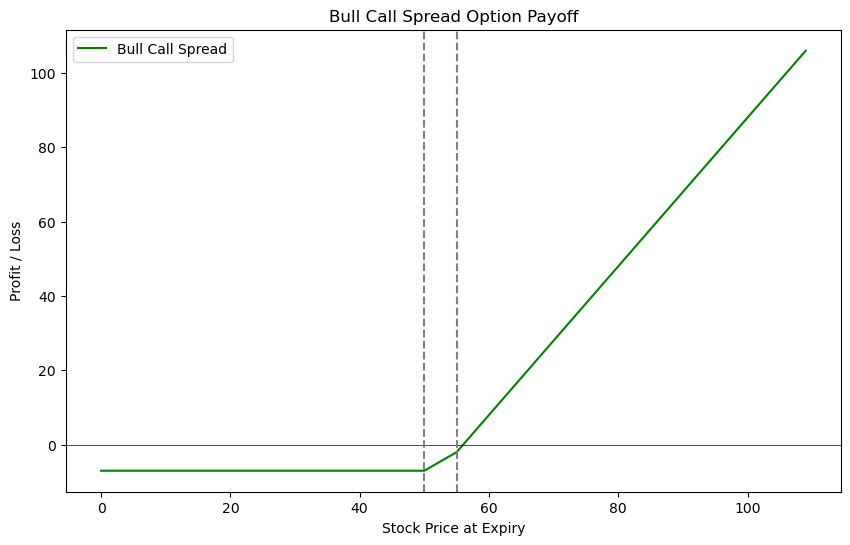

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bull_call_spread(S0, K1, C1, K2, C2):
    """
    Plots the profit/loss for a Bull Call Spread strategy.
    
    Parameters:
    S0: Current stock price
    K1: Strike price of the long call
    C1: Premium of the long call
    K2: Strike price of the short call
    C2: Premium of the short call
    """
    # Define stock price range
    sT = np.arange(0, 2 * K2, 1)
    
    # Long Call Payoff
    long_call_payoff = np.maximum(sT - K1, 0) - C1
    
    # Short Call Payoff
    short_call_payoff = C2 - np.maximum(sT - K2, 0)
    
    # Bull Call Spread Payoff
    bull_call_spread_payoff = long_call_payoff - short_call_payoff
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot Bull Call Spread Payoff
    plt.plot(sT, bull_call_spread_payoff, label='Bull Call Spread', color='green')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K1, color='gray', linestyle='--')
    plt.axvline(K2, color='gray', linestyle='--')
    plt.title('Bull Call Spread Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    
    plt.show()

# Parameters
S0 = 50        # Current stock price (not used in this case, but often relevant for initial context)
K1 = 50        # Strike price of the long call
C1 = 5         # Premium of the long call
K2 = 55        # Strike price of the short call
C2 = 2         # Premium of the short call

# Plot the Bull Call Spread payoffs
plot_bull_call_spread(S0, K1, C1, K2, C2)

The Function plot_bull_call_spread calculates the payoffs for the Long Call and Short Call. Then, computes the payoff of the Bull Call Spread as the difference between the Long Call and Short Call payoffs. And also, creates a plot to visualize the profit and loss across different stock prices at expiry.

The Bull Call Spread strategy limits both potential profit and potential loss.
- Maximum Loss: The total cost of entering the spread, which is C1−C2.
- Maximum Profit: The difference between the strike prices minus the net premium paid, which is (K2−K1)−(C1−C2).
- Break-even Point: The stock price where the net profit is zero, which can be calculated as K1+(C1−C2).

This strategy benefits from a moderate increase in the stock price while limiting both potential gains and losses. The visual provided helps in understanding how the Bull Call Spread performs under various stock price scenarios at expiration.

### Bull Put Spread: Short Put & Long Put

Bull Put Spread is used when we expect a moderate increase in the price of the underlying asset. It involves:
- Selling a Put Option (Higher Strike): This generates a premium income.
- Buying a Put Option (Lower Strike): This limits potential losses.

The payoff of the Bull Put Spread is calculated as:

                   Payoff = Net Premium Received − max(K1−ST, 0)+ max(K2−ST, 0)

Where: K1 is the strike price of the short put (higher strike) and K2 is the strike price of the long put (lower strike) while Net Premium Received is the premium received from selling the higher-strike put minus the cost of buying the lower-strike put.

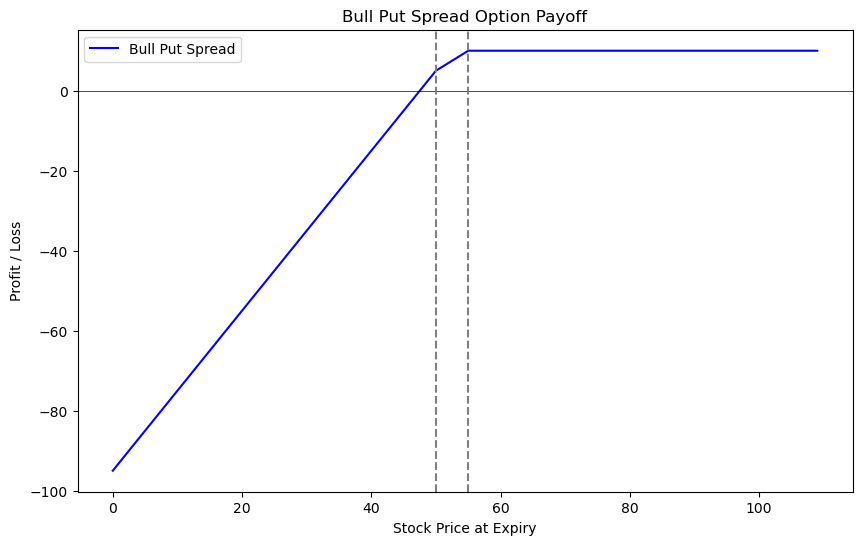

In [12]:
def plot_bull_put_spread(K1, C1, K2, C2):
    """
    Plots the profit/loss for a Bull Put Spread strategy.
    
    Parameters:
    K1: Strike price of the short put (higher strike)
    C1: Premium of the short put
    K2: Strike price of the long put (lower strike)
    C2: Premium of the long put
    """
    sT = np.arange(0, 2 * K1, 1)
    
    # Short Put Payoff
    short_put_payoff = C1 - np.maximum(K1 - sT, 0)
    
    # Long Put Payoff
    long_put_payoff = np.maximum(K2 - sT, 0) - C2
    
    # Bull Put Spread Payoff
    bull_put_spread_payoff = short_put_payoff - long_put_payoff
    
    plt.figure(figsize=(10, 6))
    plt.plot(sT, bull_put_spread_payoff, label='Bull Put Spread', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K1, color='gray', linestyle='--')
    plt.axvline(K2, color='gray', linestyle='--')
    plt.title('Bull Put Spread Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.show()

# Parameters
K1 = 55        # Strike price of the short put (higher strike)
C1 = 7         # Premium of the short put
K2 = 50        # Strike price of the long put (lower strike)
C2 = 3         # Premium of the long put

# Plot the Bull Put Spread payoffs
plot_bull_put_spread(K1, C1, K2, C2)

## 4. Bear Spread Strategy: 

The Bear Spread strategy is an options trading strategy designed to profit from a moderate decline in the price of the underlying asset. This strategy involves buying and selling call or put options with different strike prices but the same expiration date. There are two main types of bear spreads:

- Bear Call Spread: This strategy involves selling a call option with a lower strike price and buying another call option with a higher strike price.

- Bear Put Spread: This strategy involves buying a put option with a higher strike price and selling another put option with a lower strike price.



### Bear Call Spread: Long Call & Short Call 

Bear Call Spread is used when you expect a moderate decline or stability in the price of the underlying asset. It involves:

- Selling a Call Option (Lower Strike): This generates a premium income.
- Buying a Call Option (Higher Strike): This limits the potential loss.

The payoff of the Bear Call Spread is calculated as:

         Payoff = (Premium received from selling the call)−(Premium paid for buying the call)

The maximum profit and loss are defined as follows:

- Maximum Profit is the net premium received from selling the lower-strike call minus the premium paid for the higher-strike call.
- Maximum Loss is the difference between the strike prices minus the net premium received.

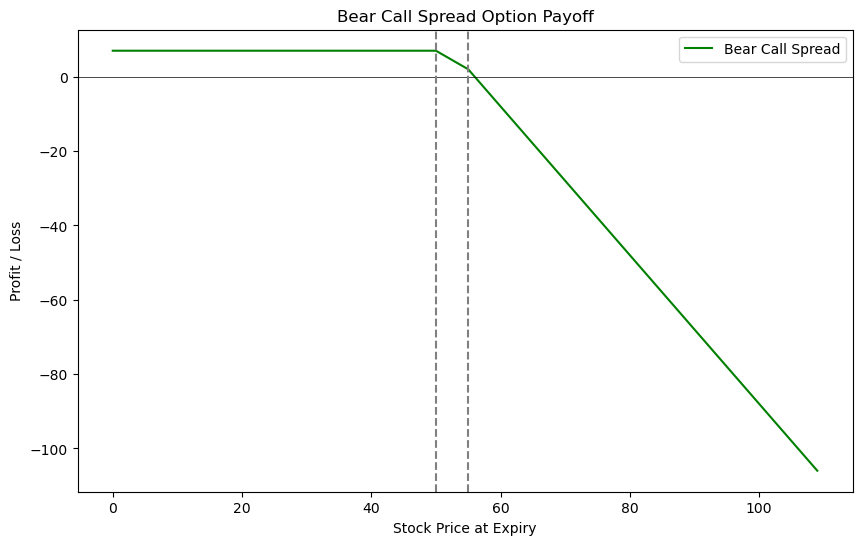

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bear_call_spread(K1, C1, K2, C2):
    """
    Plots the profit/loss for a Bear Call Spread strategy.
    
    Parameters:
    K1: Strike price of the short call
    C1: Premium of the short call
    K2: Strike price of the long call
    C2: Premium of the long call
    """
    sT = np.arange(0, 2 * K2, 1)
    
    # Short Call Payoff
    short_call_payoff = C1 - np.maximum(sT - K1, 0)
    
    # Long Call Payoff
    long_call_payoff = np.maximum(sT - K2, 0) - C2
    
    # Bear Call Spread Payoff
    bear_call_spread_payoff = short_call_payoff - long_call_payoff
    
    plt.figure(figsize=(10, 6))
    plt.plot(sT, bear_call_spread_payoff, label='Bear Call Spread', color='green')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K1, color='gray', linestyle='--')
    plt.axvline(K2, color='gray', linestyle='--')
    plt.title('Bear Call Spread Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.show()

# Parameters
K1 = 50        # Strike price of the short call
C1 = 5         # Premium of the short call
K2 = 55        # Strike price of the long call
C2 = 2         # Premium of the long call

# Plot the Bear Call Spread payoffs
plot_bear_call_spread(K1, C1, K2, C2)

### Bear Put Spread: Long Put & Short Put

Bear Put Spread is used when you expect a moderate decline in the price of the underlying asset. It involves:

- Buying a Put Option (Higher Strike) which gives us the right to sell the underlying asset at the higher strike price.
- Selling a Put Option (Lower Strike) which generates a premium income and offsets part of the cost of buying the higher-strike put.

The payoff of the Bear Put Spread is calculated as:


Payoff = (Strike price of long put − Stock price at expiry)−(Strike price of short put−Stock price at expiry) −  Net Premium Paid

The maximum profit and loss are defined as follows:
- Maximum Profit is the difference between the strike prices minus the net premium paid.
- Maximum Loss is the net premium paid.

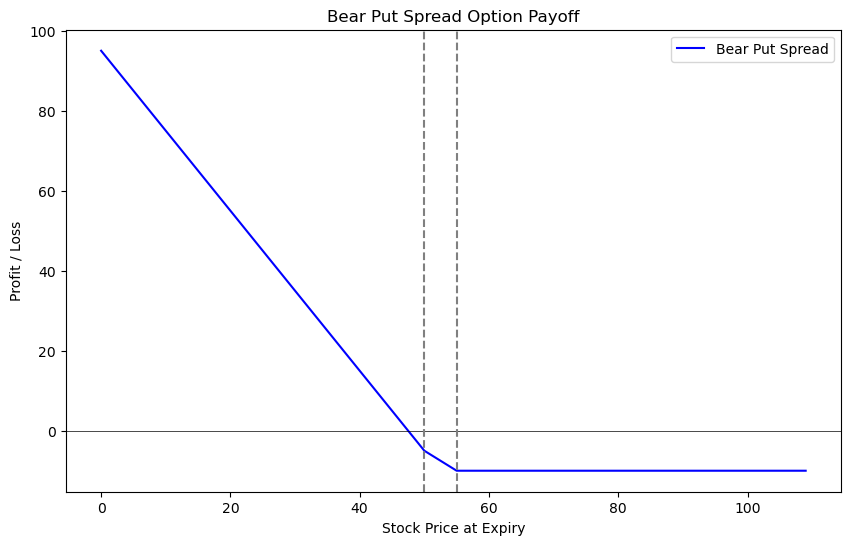

In [11]:
def plot_bear_put_spread(K1, C1, K2, C2):
    """
    Plots the profit/loss for a Bear Put Spread strategy.
    
    Parameters:
    K1: Strike price of the long put
    C1: Premium of the long put
    K2: Strike price of the short put
    C2: Premium of the short put
    """
    sT = np.arange(0, 2 * K1, 1)
    
    # Long Put Payoff
    long_put_payoff = np.maximum(K1 - sT, 0) - C1
    
    # Short Put Payoff
    short_put_payoff = C2 - np.maximum(K2 - sT, 0)
    
    # Bear Put Spread Payoff
    bear_put_spread_payoff = long_put_payoff - short_put_payoff
    
    plt.figure(figsize=(10, 6))
    plt.plot(sT, bear_put_spread_payoff, label='Bear Put Spread', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(K1, color='gray', linestyle='--')
    plt.axvline(K2, color='gray', linestyle='--')
    plt.title('Bear Put Spread Option Payoff')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.show()

# Parameters
K1 = 55        # Strike price of the long put
C1 = 7         # Premium of the long put
K2 = 50        # Strike price of the short put
C2 = 3         # Premium of the short put

# Plot the Bear Put Spread payoffs
plot_bear_put_spread(K1, C1, K2, C2)

## 5. Covered call – long a stock and short a call

Assume that we purchase 100 shares of stock A, with a price of $10 each. Thus, the total cost is $1,000. If at the same time, we write a call contract, one contract is worth 100 shares, at a price of $20. Thus, our   total  cost   will   be   reduced   by  $20. Assume further that the exercise price is $12. 

The graphical representation of our profit and loss function is as follows:

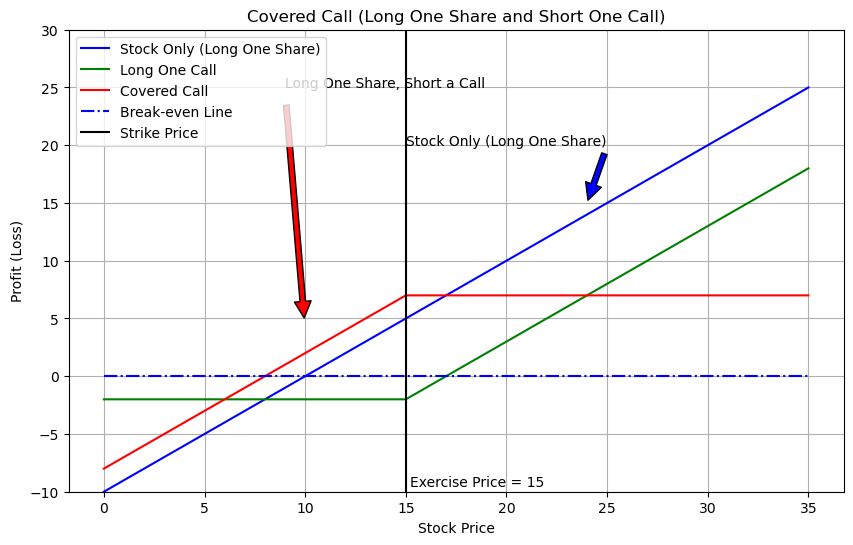

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Define stock price range, strike price, initial stock price, and call premium
sT = np.arange(0, 40, 5)
k = 15
s0 = 10
c = 2

# Define the payoff for different scenarios
y0 = np.zeros(len(sT))  # Zero profit/loss line
y1 = sT - s0           # Profit from holding the stock only
y2 = (np.maximum(sT - k, 0)) - c  # Profit from long call option
y3 = y1 - y2           # Profit from covered call strategy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sT, y1, label='Stock Only (Long One Share)', color='blue')
plt.plot(sT, y2, label='Long One Call', color='green')
plt.plot(sT, y3, label='Covered Call', color='red')
plt.plot(sT, y0, 'b-.', label='Break-even Line')

# Vertical line at the strike price
plt.plot([k, k], [-10, 30], 'black', label='Strike Price')

# Title, labels, and limits
plt.title('Covered Call (Long One Share and Short One Call)')
plt.xlabel('Stock Price')
plt.ylabel('Profit (Loss)')
plt.ylim(-10, 30)
plt.grid(True)
plt.legend()

# Annotations
plt.annotate('Stock Only (Long One Share)', xy=(24, 15), xytext=(15, 20),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Long One Share, Short a Call', xy=(10, 4), xytext=(9, 25),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Exercise Price = ' + str(k), xy=(k + 0.2, -10 + 0.5))

plt.show()

The related graph showing the positions of a Stock only call and a covered call is given in the following screenshot. Obviously, when the stock price is below $17 (15 + 2), the covered call is better than a long share.

## 6. Straddle – buy a call and a put with the same exercise prices

Let's look at a very simple scenario. A firm faces an uncertain event next month. The issue is that we are not sure about its direction, that is, whether it is a good event or a bad one. To take advantage of such an opportunity, we could buy a call and a put with the same exercise prices. This means that we will benefit either ways: the stock moves up or down. Assume further that the exercise price is $30. 

The payoff of such a strategy is given in the following code:

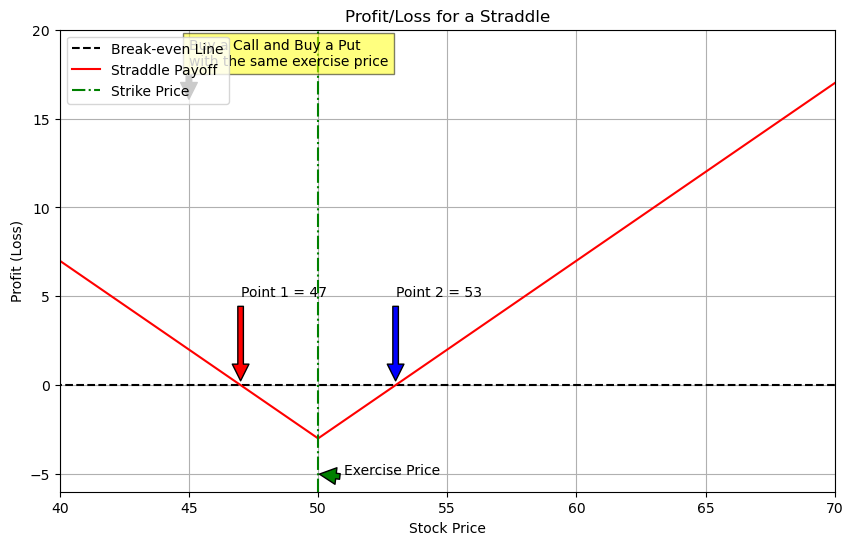

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Define the stock price range, strike price, call premium, and put premium
sT = np.arange(30, 80, 5)  # Stock prices from 30 to 75 with a step of 5
x = 50  # Strike price
c = 2    # Premium for the call option
p = 1    # Premium for the put option

# Calculate the payoff for a straddle (long call and long put)
call_payoff = np.maximum(sT - x, 0) - c
put_payoff = np.maximum(x - sT, 0) - p
straddle_payoff = call_payoff + put_payoff

# Define zero profit line
y0 = np.zeros(len(sT))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sT, y0, 'k--', label='Break-even Line')
plt.plot(sT, straddle_payoff, 'r', label='Straddle Payoff')
plt.plot([x, x], [-6, 20], 'g-.', label='Strike Price')

# Set plot limits and labels
plt.ylim(-6, 20)
plt.xlim(40, 70)
plt.title("Profit/Loss for a Straddle")
plt.xlabel('Stock Price')
plt.ylabel('Profit (Loss)')
plt.grid(True)
plt.legend()

# Annotations
plt.annotate(f'Point 1 = {x - c - p}', xy=(x - c - p, 0), xytext=(x - c - p, 5),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Point 2 = {x + c + p}', xy=(x + c + p, 0), xytext=(x + c + p, 5),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Exercise Price', xy=(x, -5), xytext=(x + 1, -5),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Buy a Call and Buy a Put\nwith the same exercise price', xy=(45, 16), xytext=(45, 18),
             bbox=dict(facecolor='yellow', alpha=0.5), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Calculations:

- Call Payoff: np.maximum(sT - x, 0) - c calculates the payoff for the call option.
- Put Payoff: np.maximum(x - sT, 0) - p calculates the payoff for the put option.
- Straddle Payoff: The total payoff for a straddle is the sum of the call and put payoffs.

Plotting:

- plt.plot(sT, y0, 'k--', label='Break-even Line'): Adds a horizontal line at zero profit.
- plt.plot(sT, straddle_payoff, 'r', label='Straddle Payoff'): Plots the profit/loss for the straddle.
- plt.plot([x, x], [-6, 20], 'g-.', label='Strike Price'): Adds a vertical line at the strike price.

Annotations:

- plt.annotate is used to add labels and arrows indicating specific points and the strike price on the plot.

- bbox=dict(facecolor='yellow', alpha=0.5) creates a background box for the annotation to make it more readable.

## 7. A calendar spread

A calendar spread involves selling a call option with a shorter maturity (T1) and buying a call option with a longer maturity (T2), where T1 < T2.

Since the call option price is positively correlated with the maturity, we have initial cash outflow. Our expectation is that when the first option matures at T1, the price of the underlying stock is close to our exercise price. 

The goal is to profit from the time decay and volatility of the underlying asset. The strategy benefits if the underlying asset price is close to the strike price at the shorter maturity.

We use the Black-Scholes model to calculate the prices of the call options.

The profit or loss from the calendar spread is computed by the difference in the value of the long call (with maturity T2) and the value of the short call (with maturity T1), adjusted for the underlying stock price.


The code and graph for this are as follows:

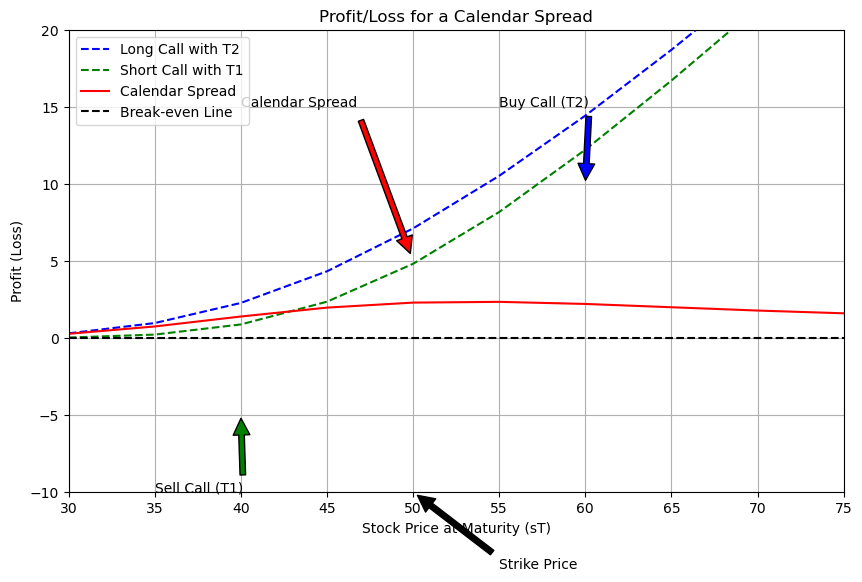

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scp

def bs_call(S, K, T, r, sigma):
    """Black-Scholes Call Option Pricing"""
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * scp.norm.cdf(d1) - K * np.exp(-r * T) * scp.norm.cdf(d2)
    return call_price

# Parameters
sT = np.arange(30, 80, 5)  # Stock prices from 30 to 75 with a step of 5
K = 50  # Strike price
T1 = 0.5  # Time to maturity for the short call
T2 = 1  # Time to maturity for the long call
sigma = 0.3  # Volatility
r = 0.05  # Risk-free rate

# Calculate the prices of the call options
call_short = bs_call(sT, K, T1, r, sigma)  # Price of the short call with maturity T1
call_long = bs_call(sT, K, T2, r, sigma)  # Price of the long call with maturity T2

# Calculate the calendar spread profit/loss
calendar_spread = call_long - call_short

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sT, call_long, 'b--', label='Long Call with T2')
plt.plot(sT, call_short, 'g--', label='Short Call with T1')
plt.plot(sT, calendar_spread, 'r', label='Calendar Spread')
plt.axhline(0, color='k', linestyle='--', label='Break-even Line')

# Set plot limits and labels
plt.ylim(-10, 20)
plt.xlim(30, 75)
plt.title("Profit/Loss for a Calendar Spread")
plt.xlabel('Stock Price at Maturity (sT)')
plt.ylabel('Profit (Loss)')
plt.grid(True)
plt.legend()

# Annotations
plt.annotate('Calendar Spread', xy=(50, 5), xytext=(40, 15),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Buy Call (T2)', xy=(60, 10), xytext=(55, 15),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Sell Call (T1)', xy=(40, -5), xytext=(35, -10),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Strike Price', xy=(K, -10), xytext=(K + 5, -15),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## 8. Butterfly with calls

This butterfly spread involves buying 2 call options at different strike prices x1 and x3 and selling 2 call options at the middle strike price x2, where x2 = (x1+x2)/2, with the same maturity for the same stock. Its profit/loss function is as follows:

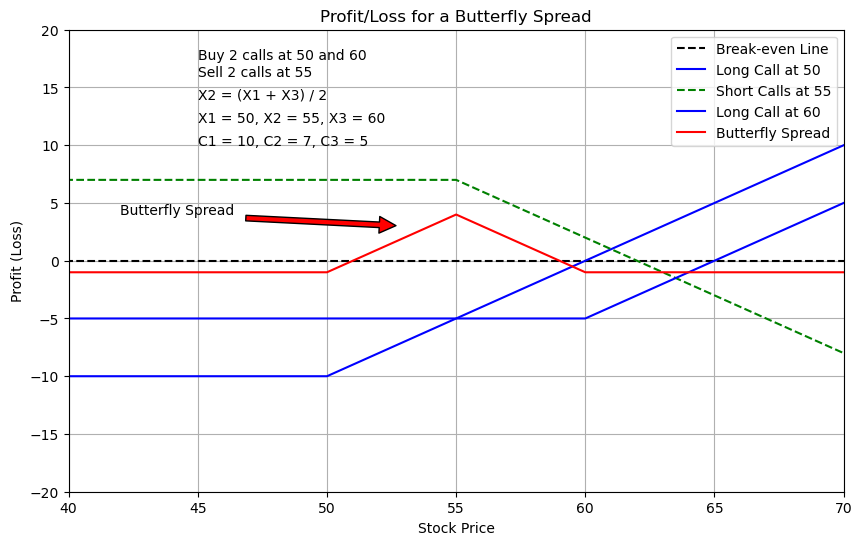

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Define the stock price range and strike prices with premiums
sT = np.arange(30, 80, 5)  # Stock prices from 30 to 75 with a step of 5
x1 = 50  # Strike price for the first long call
c1 = 10   # Premium for the first long call
x2 = 55  # Strike price for the short calls (middle strike)
c2 = 7    # Premium for the short calls
x3 = 60  # Strike price for the second long call
c3 = 5    # Premium for the second long call

# Calculate the payoff for each call option
y1 = (np.maximum(sT - x1, 0) - c1)  # Payoff for long call at x1
y2 = (np.maximum(sT - x2, 0) - c2)  # Payoff for short call at x2
y3 = (np.maximum(sT - x3, 0) - c3)  # Payoff for long call at x3

# Calculate the butterfly spread payoff
butterfly = y1 + y3 - 2 * y2

# Zero profit line
y0 = np.zeros(len(sT))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sT, y0, 'k--', label='Break-even Line')
plt.plot(sT, y1, 'b', label=f'Long Call at {x1}')
plt.plot(sT, -y2, 'g--', label=f'Short Calls at {x2}')
plt.plot(sT, y3, 'b', label=f'Long Call at {x3}')
plt.plot(sT, butterfly, 'r', label='Butterfly Spread')

# Set plot limits and labels
plt.ylim(-20, 20)
plt.xlim(40, 70)
plt.title("Profit/Loss for a Butterfly Spread")
plt.xlabel('Stock Price')
plt.ylabel('Profit (Loss)')
plt.grid(True)
plt.legend()

# Annotations
plt.annotate('Butterfly Spread', xy=(53, 3), xytext=(42, 4),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Buy 2 calls at {x1} and {x3}\nSell 2 calls at {x2}', xy=(45, 16))
plt.annotate(f'X2 = (X1 + X3) / 2', xy=(45, 14))
plt.annotate(f'X1 = {x1}, X2 = {x2}, X3 = {x3}', xy=(45, 12))
plt.annotate(f'C1 = {c1}, C2 = {c2}, C3 = {c3}', xy=(45, 10))

plt.show()